**Question 3.6a**

Let $\| \cdot \|$ denote any norm on $\mathbb{C}^m$. The corresponding *dual norm* $\| \cdot \|^{'}$ is defined by the formula $\| x \|^{'} = sup_{\| y \| = 1}{|y^{*}x|}$.

Prove that $\| \cdot \|^{'}$ is a norm.

**Solution**

By definition, a norm $ \| \cdot \| $ must satisfy three conditions, $ \forall x,y \in \mathbb{C}^{m}$ and $ \forall \alpha \in \mathbb{C}$

$$ \text{i. } \| x \| \geq 0 \text{ , and } \| x \| = 0 \text{ only if } x = 0 $$

$$ \text{ii. } \| x + y \| \leq \| x \| + \| y \| $$

$$ \text{iii. } \| \alpha x \| = | \alpha | \| x \| $$

(i.)

Since $| \cdot | \geq 0$ is a property of absolute value, $\forall x \in \mathbb{C}^{m}$, $\| x \|^{'} \geq 0 $ by the definition of $\| x \| ^ {'}$ 

Second part of the condition can be rewritten as $ x \neq 0 \implies \|x\|^{'} \neq 0$. 

(ii.)

We need to show that,
$$ \| x + y \| \leq \| x \| + \| y \| $$


$$ sup_{\|z \| = 1} | z^{*}(x+y) | \leq sup_{\|z \| = 1} | z^{*}x | + sup_{\|z \| = 1} | z^{*}y | $$

$$ sup_{\|z \| = 1} | z^{*}x+ z^{*}y | \leq sup_{\|z \| = 1} | z^{*}x | + sup_{\|z \| = 1} | z^{*}y | $$ using distributive law of matrices

We already know that $ | z^{*}x+ z^{*}y | \leq | z^{*}x | +  | z^{*}y | $ by triangle inequality for absolute values of $\mathbb{C}$. Thus, above inequalities are, indeed, true.

(iii.)

$$ \| \alpha x \| = sup_{\|y\| = 1 } | \alpha y^{*}x | $$

$$ = sup_{\|y\| = 1 } | \alpha | | y^{*}x |$$ using scaling property of absolute values of $\mathbb{C}$

$$ = | \alpha | sup_{\|y\| = 1} | y^{*}x| $$ since $|\alpha| \geq 0$ does not affect supremum operation differently whether inside or outside of the expression. 

$$ = | \alpha | \| x \|^{'} $$

**Question 4.5**

Theorem 4.1 asserts that every $A \in \mathbb{C}^{m \times n}$ has an SVD $A = U \Sigma V^*$. Show that if A is real, then it has a real SVD ($U \in \mathbb{R}^{m \times m}$, $V \in \mathbb{R}^{n \times n}$)

**Solution**

If $A \in \mathbb{R}^{m \times n}$, then $A^* A = A^T A \in \mathbb{R}^{n \times n}$ is real as well. 

Moreover, $A^T A$ is symmetric. 
$$ (A^T A)^T = A^T (A^T)^T = A^T A $$

All eigenvalues of real symmetric matrices are real and eigenvectors corresponding to distinct eigenvalues are
orthogonal.

We can also show that $A^T A$ has nonnegative eigenvalues, $ \forall x \in \mathbb{R}^n$, 
$$ x(A^T A)x = (Ax)^T (Ax) = \| Ax \| _ {2} ^ 2 \geq 0 $$

$$ A = U \Sigma V^* $$

$$ A^* A = (V \Sigma^* U^*)(U \Sigma V^*) $$

$$ = V \Sigma^2 V^* $$ since $ U^* U = I $ and $ \Sigma^* = \Sigma $

Here, $\Sigma^2 \in \mathbb{R}^{n \times n}$ and since both $A$ and $\Sigma$ are real valued matrices, V is also real valued.

Solving $A = U \Sigma V^*$ for U would give us a real valued matrix since all $A, \Sigma$, and $V$ are real valued.

** Question 5.3 **

Assume $A$ is a $ 2 \times 2 $ matrix with arbitrary entries.

Execute your program with the matrix $A = \begin{bmatrix}-2 & 11\\-10 & 5\end{bmatrix}$ in the question and report your results.

** a. ** Determine a real SVD of A in the form $ A = U \Sigma V^T$. The SVD is not unique, so find the one that has the minimal number of minus signs in U and V.

In [1]:
# Eigenvectors of A^T A make up the columns of V
# Eigenvectors of A A^T  make up the columns of U. 
# Singular values in S are square roots of eigenvalues from A A^T or A^T A.

In [2]:
function e_values = findEigenvalues(A)
## findEigenvalues finds eigenvalues of 2x2 matrices
    e_values = roots([1, -A(1,1)-A(2,2), A(1,1)*A(2,2) - A(1,2)*A(2,1)]);
end

In [3]:
function e_vectors = findEigenvectors(A)
## findEigenvectors finds eigenvectors of 2x2 matrices
    e_values = findEigenvalues(A);
    e_vectors = zeros(2,2);
    e_vectors(:,1) = null(A - eye(2) * e_values(1));
    e_vectors(:,2) = null(A - eye(2) * e_values(2));
end

In [4]:
A = [-2, 11; -10, 5];
# A = rand(2) * 10 - 5 # between -5 and 5
AAT = A * A';
ATA = A' * A;

In [5]:
# Find eigenvalues, there will be 2 of them
AAT_evalues = findEigenvalues(AAT);
# ATA_evalues = findEigenvalues(ATA) # to check result

In [6]:
# \Sigma matrix is simply diagonal matrix formed by square roots of eigenvalues
sigma = diag(sqrt(AAT_evalues))

sigma =

Diagonal Matrix

   14.1421         0
         0    7.0711



In [7]:
# U is formed by eigenvectors of A A^T
U = findEigenvectors(AAT)
# V is formed by eigenvectors of A^T A
# V = findEigenvectors(ATA);
# it does not give correct result when we find both matrices using findEigenvectors
V = zeros(2);
V(:, 1) = linsolve(A, sigma(1) * U(:,1));
V(:, 2) = linsolve(A, sigma(4) * U(:,2));

V_tp = V'

U =

   0.70711  -0.70711
   0.70711   0.70711

V_tp =

  -0.60000   0.80000
  -0.80000  -0.60000



In [8]:
# check the result
M = U * sigma * V'
A

M =

   -2   11
  -10    5

A =

   -2   11
  -10    5



**b. ** List the singular values, left singular vectors, and right singular vectors of A. Draw a careful, labeled picture of the unit ball in $\mathbb{R}^2$ and its image under A, together with the singular vectors, with the coordinates of their vertices marked.

singular values
ans =

   14.1421
    7.0711

left singular vectors
U =

   0.70711  -0.70711
   0.70711   0.70711

right singular vectors
V =

  -0.60000  -0.80000
   0.80000  -0.60000



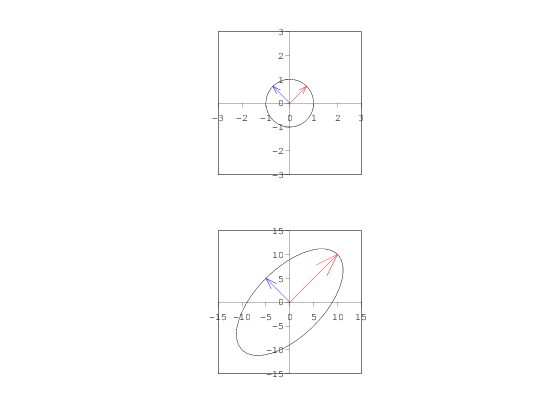

In [9]:
disp('singular values')
sqrt(AAT_evalues)
disp('left singular vectors')
U
disp('right singular vectors')
V

L = U * sigma;
circ = linspace(0, 2*pi, 42);
x1 = cos(circ);
x2 = sin(circ);
x = [x1; x2];
ellipse = A * x;


fig1 = figure;

title('left singular vectors on unit circle and its image under A')
subplot(2, 1, 1);
plot(x1, x2, 'color', 'black');
hold on;
quiver(0, 0, U(1, 1), U(2, 1), 'color', 'red');
quiver(0, 0, U(1, 2), U(2, 2), 'color', 'blue');
xlim([-3, 3]);
ylim([-3, 3]);

axis equal;
set(gca, "xaxislocation", "zero");
set(gca, "yaxislocation", "zero");
set(gca, "box", "off");

subplot(2, 1, 2);
plot(ellipse(1,:), ellipse(2,:), 'color', 'black');
hold on;
quiver(0, 0, L(1, 1), L(2, 1), 'color', 'red');
quiver(0, 0, L(1, 2), L(2, 2), 'color', 'blue');
xlim([-15, 15]);
ylim([-15, 15]);

axis equal;
set(gca, "xaxislocation", "zero");
set(gca, "yaxislocation", "zero");
set(gca, "box", "off");

**c. ** What are the $1-$, $2-$, $\infty-$, and Frobenius norms of $A$? 

In [10]:
# 1-norm is the max column sums as we mentioned in hw2
norm1 = max(sum(A(:,1)), sum(A(:,2)))

# 2-norm is the maximum singular value, i.e \sigma_1
norm2 = sqrt(AAT_evalues(1))

# \infty-norm is the max row sums as we mentioned in hw2
norm_infty = max(sum(A(1,:)), sum(A(2,:)))

# Frobenius norm is the square root of the trace of A^T A
norm_frobenius = sqrt(AAT(1) + AAT(4))

norm1 =  16
norm2 =  14.142
norm_infty =  9
norm_frobenius =  15.811


**d. ** Find $A^{-1}$ not directly, but via the SVD.

In [11]:
# To find A^-1 we need to find V \sigma^-1 U^T
sigma_inv = sigma ^ -1;
A_inv = V * sigma_inv * U'

A_inv =

   0.050000  -0.110000
   0.100000  -0.020000



**e. ** Find the eigenvalues $\lambda_{1}$ and $\lambda_{2}$ of $A$.

In [12]:
A_evalues = findEigenvalues(A)

A_evalues =

   1.5000 + 9.8869i
   1.5000 - 9.8869i



**f. ** Verify that $det A = \lambda_1 \lambda_2$ and $|detA| = \sigma_1 \sigma_2$.

In [13]:
detA = det(A)
productOfEigenvalues = A_evalues(1) * A_evalues(2)
productOfSigmas = sigma(1) * sigma(4)

detA =  100
productOfEigenvalues =  100.00
productOfSigmas =  100.00


**g. ** What is the area of the elipsoid onto which A maps the unit ball of $\mathbb{R}^2$?

In [14]:
# Area of an ellipse is simply \pi * r_1 * r_2 where r_1 = \sigma_1 and r_2 = \sigma_2 in our case
areaOfEllipse = pi*abs(productOfEigenvalues)

areaOfEllipse =  314.16
